<a href="https://colab.research.google.com/github/Netruk44/notebook-image-helper/blob/master/notebooks/improved_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install packages (you will have to restart the runtime for the packages to finish installing)
!pip install mpi4py

!git clone https://github.com/openai/improved-diffusion
!git clone https://github.com/Netruk44/notebook-image-helper

%cd /content/improved-diffusion
!pip install -e .

%cd /content/notebook-image-helper
!pip install -e .

%cd /content/

     |████████████████████████████████| 2.5 MB 32.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.3-cp37-cp37m-linux_x86_64.whl size=2185303 sha256=b2a301e16104634cf16b0727010dba1564664e086eea8fe43628224a13a77ca8
  Stored in directory: /root/.cache/pip/wheels/7a/07/14/6a0c63fa2c6e473c6edc40985b7d89f05c61ff25ee7f0ad9ac
Successfully built mpi4py
Cloning into 'improved-diffusion'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 53 (delta 10), reused 8 (delta 8), pack-reused 26
Unpacking objects: 100% (53/53), done.
Cloning into 'notebook-image-helper'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 86 (delta 44), reused 81 (delta 40), pack-reused 0
Unpacki

In [2]:
# Download checkpoint
!wget https://openaipublic.blob.core.windows.net/diffusion/march-2021/imagenet64_uncond_100M_1500K.pt

--2022-05-13 06:28:16--  https://openaipublic.blob.core.windows.net/diffusion/march-2021/imagenet64_uncond_100M_1500K.pt
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 20.60.241.33
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|20.60.241.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 484363296 (462M) [application/octet-stream]
Saving to: ‘imagenet64_uncond_100M_1500K.pt’

imagenet64_uncond_1 100%[===================>] 461.92M  6.62MB/s    in 65s     

2022-05-13 06:29:22 (7.10 MB/s) - ‘imagenet64_uncond_100M_1500K.pt’ saved [484363296/484363296]



In [1]:
# If this fails, restart your runtime (Ctrl-M, .)
import image_helper


100%|██████████| 25/25 [01:44<00:00,  4.18s/it]


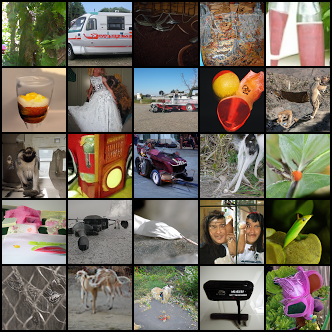

In [2]:
# Once everything is setup, this cell has all you need to generate images.
from image_helper.adapters.improved_diffusion_adapter import DiffusionImageHelper

# Load the model
image_helper = DiffusionImageHelper(
    model_dir = '/content/imagenet64_uncond_100M_1500K.pt',
    device = 'cuda:0',
    max_batch_size = 16,

    creation_args = {      # Make sure this matches up with the arguments used to train the model!
        'image_size': 64,  # If you get an error during loading, you might need to update these parameters.
        'num_channels': 128,
        'num_res_blocks': 3,
        'learn_sigma': True,
        'diffusion_steps': 4000,
        'noise_schedule': 'cosine',
    }
)

# Generate images
images = image_helper.generate_images(
    num_samples = 25, 
    generator_args = {
        'diffusion_steps': 250,
    }, 
    show_progress = True,
)

# Show the images
images.show()